In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
names = ['ID','Name','Label','Confidence','City','Country', 'Longitude', 'Latitude','Category','MainCategory', 'LabelScore', 'CategoryScore','MainCategoryScore']
dataset = pd.read_csv("F:/Masters/Semester 3/Thesis/x17170885/Dataset/dataset1.csv", delimiter=",",names=names)
dataset.drop(dataset.columns[[0,1, 2, 3, 4, 5, 6, 7, 8, 9]], axis=1, inplace=True)
dataset = dataset.iloc[1:]


In [93]:
dataset.head()

,LabelScore,CategoryScore,MainCategoryScore
1,215,2,3
2,377,2,3
3,359,2,3
4,273,3,3
5,385,3,3


In [94]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 2].values

In [95]:
X_train

array([[-0.03674541,  0.66937785],
       [-1.54210868,  0.66937785],
       [ 0.45539258, -0.17633469],
       ...,
       [ 0.45539258, -0.17633469],
       [ 1.20807422,  0.66937785],
       [-1.57684783,  0.66937785]])

In [96]:
y

array(['3', '3', '3', ..., '1', '1', '1'], dtype=object)

In [97]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

In [99]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [100]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [101]:
y_pred = classifier.predict(X_test)  


In [102]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 54   6  26  38]
 [  8  82  13  92]
 [ 21  13  82  36]
 [ 35  64  38 230]]
              precision    recall  f1-score   support

           0       0.46      0.44      0.45       124
           1       0.50      0.42      0.46       195
           2       0.52      0.54      0.53       152
           3       0.58      0.63      0.60       367

   micro avg       0.53      0.53      0.53       838
   macro avg       0.51      0.51      0.51       838
weighted avg       0.53      0.53      0.53       838



In [103]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

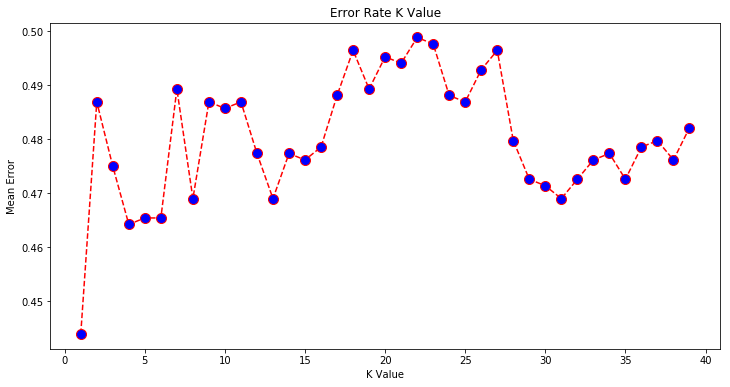

In [104]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  